*This notebook is part of  course materials for CS 345: Machine Learning Foundations and Practice at Colorado State University.
Original versions were created by Asa Ben-Hur.
The content is availabe [on GitHub](https://github.com/asabenhur/CS345).*

*The text is released under the [CC BY-SA license](https://creativecommons.org/licenses/by-sa/4.0/), and code is released under the [MIT license](https://opensource.org/licenses/MIT).*

<img style="padding: 10px; float:right;" alt="CC-BY-SA icon.svg in public domain" src="https://upload.wikimedia.org/wikipedia/commons/d/d0/CC-BY-SA_icon.svg" width="125">


<a href="https://colab.research.google.com/github//asabenhur/CS345/blob/master/notebooks/module07_03_regularization_revisited.ipynb">
  <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%autosave 0
%matplotlib inline

Autosave disabled


# Regularization revisited

Regularization as a method for combating overfitting was presented in the context of linear regression.  In this notebook we will describe it as a general theme in machine learning.

First, let's revisit linear regression.
Recall that linear regression, which is based on the sum-squared error

$$
J_\mathrm{linear-regression}(\mathbf{w}) = \frac{1}{N}\sum_{i=1}^N(y_i-\hat{y}_i)^2,
$$

was augmented with a regularization term, either the $L_2$ regularizer to give the ridge regression method:

$$
J_\mathrm{ridge}(\mathbf{w}) = \frac{1}{N}\sum_{i=1}^N \underbrace{(y_i-\hat{y}_i)^2}_{\text{squared loss}} + \underbrace{\alpha \,||\mathbf{w}||_2^2}_{\text{$L_2$ regularizer}}
$$

or the $L_1$ regularizer, giving rise to the Lasso:

$$
J_\mathrm{lasso}(\mathbf{w}) = \frac{1}{N}\sum_{i=1}^N(y_i-\hat{y}_i)^2 + \alpha \,||\mathbf{w}||_1.
$$

Recall that $||\mathbf{w}||_1 = \sum_{i=1} |w_i|$ is the $L_1$ norm, and $||\mathbf{w}||_2^2 = \mathbf{w}^\top\mathbf{w}$ is the standard Euclidean norm ($L_2$).


A similar augmentation can be performed for logistic regression as we will see next.

As we have seen in the previous notebook, logistic regression can be expressed using the following error function:

$$ 
J(\mathbf{w})= \frac{1}{N}\sum_{i=1}^N \mathcal{l}^{CE}(y_i,\mathbf{x}_i; \mathbf{w}),
$$

where $\mathcal{l}^{CE}(y,\mathbf{x}; \mathbf{w})$ is the cross-entropy loss function, which is a loss function for classification problems:

$$
\mathcal{l}^{CE}(y,\mathbf{x}; \mathbf{w}) = - y \log \left( \sigma(\mathbf{w}^\top \mathbf{x}) \right) - (1-y) \log \left(1 - \sigma(\mathbf{w}^\top \mathbf{x})\right),
$$

and $\sigma(s)$ is the logistic function which is defined by:

$$
\sigma(s) = \frac{1}{1 + e^{-s}}.
$$


Like in linear regression, the logistic regression error function can be augmented by a regularization term, either $L_1$ or $L_2$:

$$ 
J_1(\mathbf{w})= \frac{1}{N}\sum_{i=1}^N \mathcal{l}^{CE}(y_i,\mathbf{x}_i; \mathbf{w}) + \alpha ||\mathbf{w}||_1.
$$

or

$$ 
J_2(\mathbf{w})= \frac{1}{N}\sum_{i=1}^N \mathcal{l}^{CE}(y_i,\mathbf{x}_i; \mathbf{w}) + \alpha ||\mathbf{w}||_2^2.
$$

The gradient of the logistic regression loss function is:

$$
\nabla J(\mathbf{w}) = \frac{1}{N}\sum_{i=1}^{N} \left(\sigma(\mathbf{w}^\top \mathbf{x}_i) - y_i\right) \mathbf{x}_i
$$

The gradient of the augmented loss functions is easy to compute.  For $J_2$ - the $L_2$-augmented loss function we have 


$$
\nabla J_2(\mathbf{w}) = \frac{1}{N}\sum_{i=1}^{N} \left(\sigma(\mathbf{w}^\top \mathbf{x}_i) - y_i\right) \mathbf{x}_i + 2 \mathbf{w}.
$$

The $L_1$ regularizer is not "smooth" - it has a kink at 0, so more sophisticated optimization methods than gradient descent are required in order to address it.

### Loss + regularization as a general theme in machine learning

As we have seen above, the cost functions associated with many machine learning methods can be expressed as a sum of two terms:  a loss term that quantifies the errors made by the classifier and a regularization term that helps prevent overfitting: 

$$
J(\mathbf{w}) = \underbrace{\frac{1}{N}\sum_{i=1}^N \mathcal{l}(y_i, \hat{y}_i)}_{\mathrm{loss~term}} ~~+ \underbrace{\alpha \, \Omega (\mathbf{w})}_{\mathrm{regularization~term}}.
$$

Here $\mathcal{l}(y, \hat{y})$ is the loss function that quantifies the error for predicting $\hat{y}$ when the real label is $y$ and $\Omega (\mathbf{w})$ is a regularization term. 
In addition to logistic regression, and the various regression methods (Lasso and Ridge regression), additional examples include neural networks and support vector machines.

A different way to combine loss and regularization is to put the regularization parameter in front of the loss term:

$$
J(\mathbf{w}) = \underbrace{\frac{C}{N}\sum_{i=1}^N \mathcal{l}(y_i, \hat{y}_i)}_{\mathrm{loss~term}} ~~+ \underbrace{\Omega (\mathbf{w})}_{\mathrm{regularization~term}}.
$$

In this parameterization, a large value of $C$ represents weak regularization, and a small value of $C$ represents strong regularization.  The scikit-learn implementation of logistic regression uses this parameterization.

### Exercise

Modify the implementation of logistic regression from the previous notebook to include $L_2$ regularization.


### Regularized logistic regression on the MNIST dataset

MNIST is one of the most well-used (or over-used) datasets in machine learning.  It is an image classification problem where the inputs are 28 x 28 images of the digits 0-9.  We will use one of two versions - the classic MNIST, or a newer, somewhat more difficult one - the Fashion-MNIST dataset.  As its name suggests, the objective is to classify images of several types of clothing:
t-shirt/top, trouser, pullover, dress, coat, sandal, shirt, sneaker, bag, or ankle boot.  Here's an image that collects examples of these classes:

<img style="padding: 10px; float:center;" alt="MIT license" src="https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png" width="400">


To retrieve the dataset we'll use scikit-learn's [fetch_openml](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html) function that retrieves datasets from [openml](https://www.openml.org/).

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

The first time you load the dataset it may take longer, since the dataset is first stored on your machine, typically at `~/scikit_learn_data`.

In [3]:
# load fashion-mnist data from https://www.openml.org/d/40996
X, y = fetch_openml('fashion-mnist', version=1, return_X_y=True)
# each example is a 28 x 28 image, leading to a feature vector with 
# 784 dimensions
X.shape

(70000, 784)

If you wish to use the original MNIST digit classification dataset use the following instead:

In [ ]:
# Load MNIST digit classification data from https://www.openml.org/d/554
# X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
# each example is a 28 x 28 image, leading to a feature vector with 
# 784 dimensions
# X.shape

Let's display one of the images by reshaping it into a 28 x 28 array:

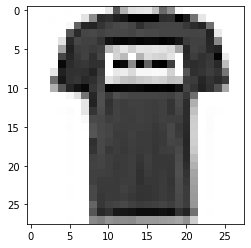

In [4]:
plt.imshow(X[1].reshape(28,28), cmap='Greys');

In [8]:
# the original data are integers between 0 and 255.  
# We'll normalize it to be between 0 and 1:
X = X/255.0

# we will choose 5000 training examples and 10000 test examples from 
# the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=5000, test_size=10000, shuffle=True, random_state=42)

First let's use logistic regression without regularization:

In [9]:
# scikit-learn will generate some warnings, which we will choose
# to ignore
import warnings
warnings.filterwarnings('ignore')
lr = LogisticRegression(penalty='none', solver='saga', max_iter=100)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
np.mean(y_pred == y_test)

0.8292

Next, logistic regression with the $L_2$ regularizer:

In [10]:
lr = LogisticRegression(penalty='l2', solver='saga', C=0.1, max_iter=100)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
np.mean(y_pred == y_test)

0.8388

There is an improvement over the unregularized version.  Because of the size of the dataset, this difference is likely to be meaningful.  Let's see how $L_1$ regularization does:

In [13]:
lr = LogisticRegression(penalty='l1', solver='saga', C=1, max_iter=100)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
np.mean(y_pred == y_test)

0.8357

To really see the effect of regularization, it is best to explore a range of values for the regularization parameter.

### Avoiding overfitting by early stopping

Another way to avoid overfitting is to stop the training process before it has converged.  Our objective is a good classifier and not to optimize the cost function.  So let's see how accuracy varies with the number epochs:

In [16]:
max_iter_list = [5, 10, 15, 20, 50, 100, 200]
accuracy = []
for max_iter in max_iter_list :
    lr = LogisticRegression(penalty='none', solver='saga', 
                            max_iter=max_iter)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    accuracy.append(np.mean(y_pred == y_test))
print(accuracy)

[0.831, 0.8385, 0.8412, 0.8419, 0.8384, 0.8298, 0.8209]


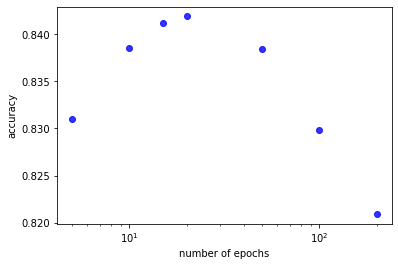

In [21]:
plt.semilogx(max_iter_list, accuracy, 'ob', alpha=0.8)
plt.xlabel('number of epochs')
plt.ylabel('accuracy');

We observe that accuracy first increases as the number of epochs increases.  At some point it starts to decrease as we begin to overfit.

It is possible to combine $L_2$ regularization with early stopping, but the results are not any better than early stopping:

In [15]:
max_iter_list = [5, 10, 15, 20, 50, 100, 200]
accuracy = []
for max_iter in max_iter_list :
    lr = LogisticRegression(penalty='l2', solver='saga', C=1, 
                            max_iter=max_iter)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    accuracy.append(np.mean(y_pred == y_test))
print(accuracy)

[0.831, 0.8381, 0.8407, 0.8414, 0.8387, 0.8333, 0.828]


### Nonlinear decision boundaries using polynomial features

Next, we will show how to use polynomial features to handle data that is not linearly separable, and how regularization can help us in situations like that.

As a toy example, we will use data generated using scikit-learn's [make_circles](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html) function:

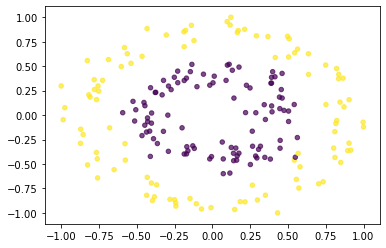

In [24]:
from sklearn.datasets import make_circles
X,y = make_circles(n_samples=200, noise=0.1, random_state=42, factor=0.5)
# n_samples is the number of examples to generate
# noise parameter is the standard deviation of Gaussian noise 
# added to the data.
# factor: scale factor between inner and outer circle

# next:  scale data to be between -1 and 1:

X[:,0] = 2 * (X[:,0] - min(X[:,0])) / (max(X[:,0]) - min(X[:,0])) - 1
X[:,1] = 2 * (X[:,1] - min(X[:,1])) / (max(X[:,1]) - min(X[:,1])) - 1

plt.scatter(X[:,0], X[:,1], c=1-y, alpha=0.7, s=20);

Clearly, this data is not linearly separable.  To obtain a classifier that is able to classify this data we will use the same approach we used in basis function regression:  apply a nonlinear function to our data.  Rather than classify the original data, we will first apply a function $\Phi(\mathbf{x})$ to our feature vectors:

$$
\Phi(\mathbf{x}) = (\phi_1(\mathbf{x}),\ldots,\phi_D(\mathbf{x})).
$$

The collection of functions $\phi_1(\mathbf{x}), \ldots, \phi_D(\mathbf{x})$ are the basis functions.  As we have done previously, we will use monomials up to a given degree as our basis functions.
For example, for two dimensional data $\mathbf{x} = (x_1, x_2)$ and monomials with degree up to 2 the resulting set of features is

$$
(1, x_1, x_2, x_1^2, x_2^2, x_1 x_2).
$$

The dot product in the space of our polynomial features takes on the form:

$$
\mathbf{w}^{\top} \Phi(\mathbf{x}) = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_1^2 + w_4 x_2^2 + w_5 x_1 x_2
$$

For example:

In [22]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2, include_bias=True)
# include bias determines if to include the case where all feature 
# powers are zero; this serves as a bias term 
poly.fit_transform(np.array([[2, 3], [3, 4]]))

array([[ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  3.,  4.,  9., 12., 16.]])

Code to plot the decision boundary of a classifier:

In [23]:
def plot_boundary(classifier, X, y, axis=None) :
    plt.style.use('default')
    axis.scatter(X[:,0], X[:,1], c=1-y, alpha=0.5, s=20, cmap='magma');

    delta = 0.01
    xmin=-1.25;xmax=1.25;ymin=-1.25;ymax=1.25
    xs = np.arange(xmin, xmax, delta)
    ys = np.arange(ymin, ymax, delta)
    x_grid, y_grid = np.meshgrid(xs, ys)

    X_grid = np.vstack([x_grid.ravel(), y_grid.ravel()]).T
    Z = classifier.decision_function(X_grid)
    Z = Z.reshape(x_grid.shape)

    im = axis.imshow(Z, origin='lower',
                     cmap=plt.cm.gray, extent=(xmin,xmax,ymin,ymax) )

    C = axis.contour(x_grid, y_grid, Z, 6, 
                     origin='lower',
                     linewidths=(1,1,1,1,1,1,1,1),
                     colors = 'black')

    #plt.clabel(C, inline=1, fmt='%1.2f')

Let us demonstrate it on the circles data:

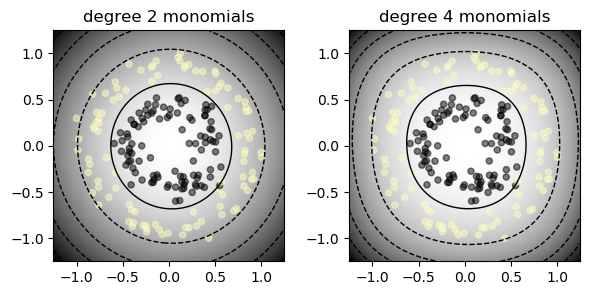

In [27]:
import warnings
warnings.filterwarnings('ignore') 

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(7,3))

lr1 = make_pipeline(PolynomialFeatures(2), 
                    LogisticRegression(penalty='none', 
                                      solver='saga'))
lr1.fit(X,y)
plot_boundary(lr1, X, y, ax1)

lr2 = make_pipeline(PolynomialFeatures(4), 
                    LogisticRegression(penalty='none', 
                                      solver='saga'))
lr2.fit(X,y)
plot_boundary(lr2, X, y, ax2)
ax1.set_title('degree 2 monomials')
ax2.set_title('degree 4 monomials');

As you can see, there is some overfitting with degree 4 monomials.  Let's address that with $L_1$ regularization:

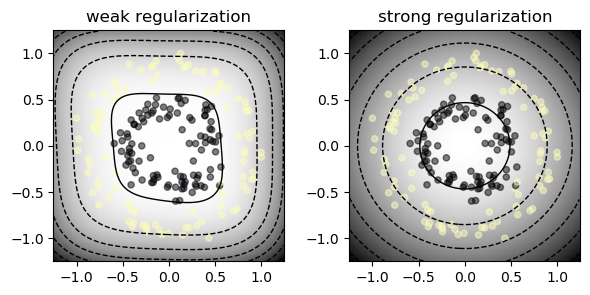

In [28]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(7,3))

lr = make_pipeline(PolynomialFeatures(4), 
                   LogisticRegression(penalty='l1', 
                                      solver='liblinear', 
                                      C=10000))
lr.fit(X,y)
plot_boundary(lr, X, y, ax1)

lr = make_pipeline(PolynomialFeatures(4), 
                   LogisticRegression(penalty='l1', 
                                      solver='liblinear', 
                                      C=0.1))
lr.fit(X,y)
plot_boundary(lr, X, y, ax2)
ax1.set_title('weak regularization')
ax2.set_title('strong regularization');

As you can see, the strongly regularized classifier has a more "reasonable" decision boundary.  To demonstrate the effect of $L_1$ regularization let's take a look at the weight vector and the values assigned to different monomials:

In [29]:
lr_poly = LogisticRegression(penalty='l1', solver='liblinear', C=1000)

poly = PolynomialFeatures(6)
X_poly = poly.fit_transform(X)

lr_poly.fit(X_poly, y);

In [30]:
print('degree','monomial','  weight')
for i in range(len(poly.powers_)) :
    print (sum(poly.powers_[i]),'\t',poly.powers_[i],'\t', lr_poly.coef_[0][i])

degree monomial   weight
0 	 [0 0] 	 24.10113968461851
1 	 [1 0] 	 13.749070212991857
1 	 [0 1] 	 0.0
2 	 [2 0] 	 -29.884280283498192
2 	 [1 1] 	 -24.33307264003451
2 	 [0 2] 	 -101.47193177825051
3 	 [3 0] 	 -44.95876473285891
3 	 [2 1] 	 0.0
3 	 [1 2] 	 0.0
3 	 [0 3] 	 0.0
4 	 [4 0] 	 -268.7392555937743
4 	 [3 1] 	 0.0
4 	 [2 2] 	 0.0
4 	 [1 3] 	 0.0
4 	 [0 4] 	 -22.14439610105965
5 	 [5 0] 	 0.0
5 	 [4 1] 	 0.0
5 	 [3 2] 	 0.0
5 	 [2 3] 	 0.0
5 	 [1 4] 	 0.0
5 	 [0 5] 	 0.0
6 	 [6 0] 	 0.0
6 	 [5 1] 	 0.0
6 	 [4 2] 	 0.0
6 	 [3 3] 	 0.0
6 	 [2 4] 	 0.0
6 	 [1 5] 	 0.0
6 	 [0 6] 	 0.0


We observe that most of the coefficients for monomials of degree higher than two are most zero.  We have already seen this characteristic in the context of polynomial regression:  $L_1$ regularization leads to very sparse solutions, i.e. tends to zero out many components of the weight vector.

### Should I do this in practice?

The approach of mapping data to a higher dimensional space using a nonlinear function can be highly effective, but suffers from a big drawback:  it becomes less and less feasible as the dimensionality of the input data increases.  SVMs and other kernel-based methods address this issue by *implicitly* mapping the data to a high dimensional space using *kernels*.  You can find a discussion of SVMs and kernels methods in the following paper:

> A. Ben-Hur and J. Weston. [A User’s guide to Support Vector Machines](https://www.cs.colostate.edu/~asa/pdfs/howto.pdf).  2009.

An entirely different approach is to use neural networks.  Neural networks achieve non-linearity by using multiple layers of perceptron-like units.  Whereas the non-linearity provided by basis functions is fixed by the choice of basis functions, neural networks essentially learn a nonlinearity that is appropriate for representing the given classification problem as we will see in our next notebooks.